In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("../datasets/fish_weight_prediction.csv")
df

,Species,Length_cm,Height_cm,Width_cm,Age,Water_Temperature_C,Weight_g
0,Pike,75.248280,22.908085,2.950060,12,12.655682,167.752799
1,Roach,49.559323,6.802108,10.090462,12,21.782932,107.043116
2,Perch,58.765558,6.781418,14.755312,12,7.906534,121.914442
3,Roach,74.574957,5.302712,4.471399,7,15.113935,151.554089
4,Roach,59.506704,28.912535,12.303737,10,6.240828,145.009638
...,...,...,...,...,...,...,...
995,Carp,61.620364,29.528593,2.874044,6,11.939179,149.099347
996,Bass,45.855534,19.238494,9.733016,13,13.636142,102.157724
997,Bass,57.615945,11.488545,11.605267,13,20.635597,133.288893
998,Pike,12.917103,15.924897,2.421765,3,14.683461,30.828589


<AxesSubplot:xlabel='Weight_g', ylabel='Count'>

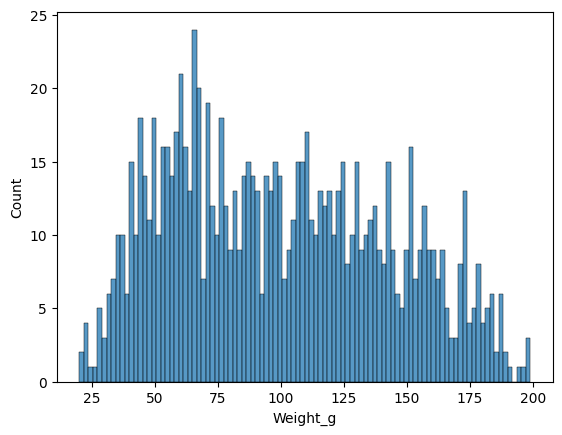

In [263]:
sns.histplot(df.Weight_g , bins=100)

<AxesSubplot:>

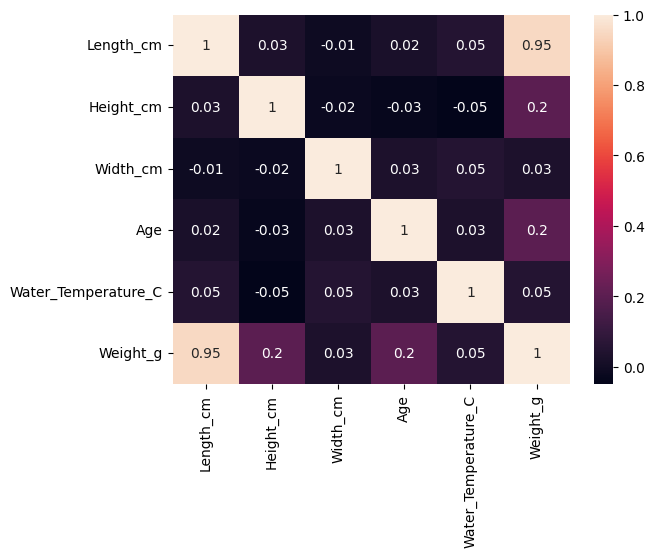

In [264]:
c = df.corr().round(2)
sns.heatmap(c , annot=True)

<AxesSubplot:xlabel='Age', ylabel='Weight_g'>

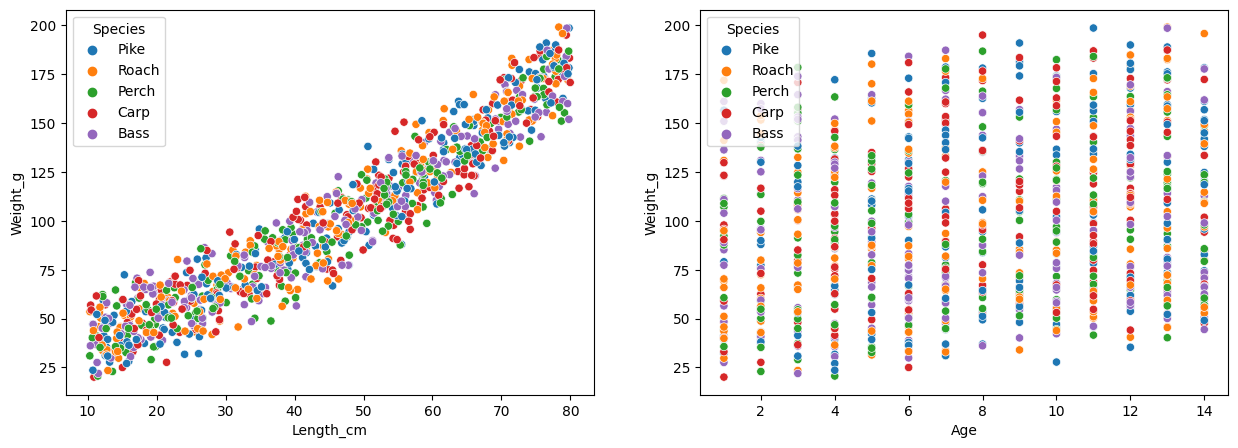

In [265]:
plt.figure(figsize=(15,5))

plt.subplot(1 , 2 , 1)
sns.scatterplot(data=df , x="Length_cm" , y="Weight_g" , hue="Species")

plt.subplot(1 , 2 , 2)
sns.scatterplot(data=df , x="Age" , y="Weight_g" , hue="Species")

In [266]:
data_x = df[["Length_cm"]].values
data_y = df["Weight_g"].values

In [267]:
poly = PolynomialFeatures(degree=2)
data_x_poly = poly.fit_transform(data_x)

In [268]:
x_train , x_test , y_train , y_test = train_test_split(data_x_poly , data_y , test_size=0.2)

In [269]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [270]:
model.score(x_train , y_train)

0.9226099469321447

In [271]:
model.score(x_test , y_test)

0.9233139387100588